In [169]:
import numpy as np
import matplotlib.pyplot as plt

In [170]:
def feature_normalize(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x_norm = (x - mu) / sigma
    return x_norm, mu, sigma

In [171]:
def compute_cost(x, y, w):
    m = len(y)
    predictions = x.dot(w)
    squared_errors = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(squared_errors)

In [172]:
def gradient_descent(x, y, w, alpha, num_iters):
    for iter in range(num_iters):
        predictions = np.matmul(x, w)
        errors = predictions - y
        delta = np.matmul(np.transpose(x), errors)
        w = w - (alpha * delta)
    return w

In [173]:
def plot_model(x, y, w, x_mu, x_sigma):
    plt.figure(1)
    test_x = np.array([])
    test_y = np.array([])
    minX = int(np.min(x))
    maxX = int(np.max(x))
    for i in range(minX, maxX):
        normalized_x = (i - x_mu) / x_sigma
        estimated_y = np.matmul(np.transpose(w), np.array([1, normalized_x]))
        test_x = np.append(test_x, i)
        test_y = np.append(test_y, estimated_y)
    plt.plot(x, y, linestyle='None', marker='o')
    plt.plot(test_x, test_y)

In [174]:
def plot_cost_contour(x, y, w):
    plt.figure(2)
    weight0_vals = np.linspace(w[0] - 100, w[0] + 100, 100)
    weight1_vals = np.linspace(w[1] - 100, w[1] + 100, 100)
    J_vals = np.zeros((len(weight0_vals), len(weight1_vals)))
    for i, weight0 in enumerate(weight0_vals):
        for j, weight1 in enumerate(weight1_vals):
            weight = np.array([weight0, weight1])
            J_vals[i, j] = compute_cost(x, y, weight)
    plt.contour(weight0_vals, weight1_vals, J_vals.T, levels=np.logspace(0, 20, 100), cmap='viridis')
    plt.xlabel('weight 0')
    plt.ylabel('weight 1')
    plt.title('Contour Plot of Cost Function')
    plt.colorbar(label='Cost')
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


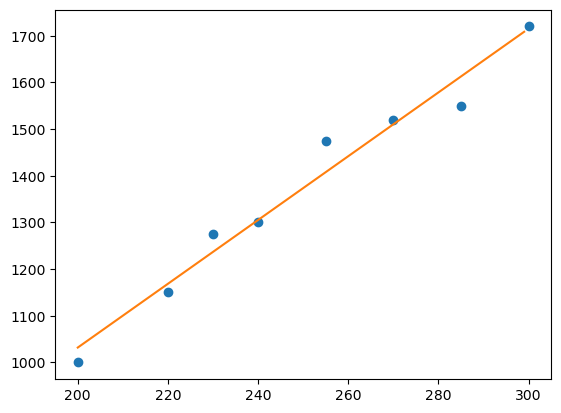

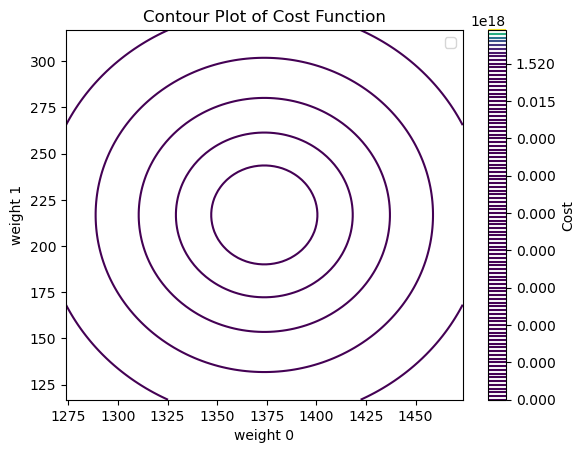

In [175]:
area = np.array([200, 220, 230, 240, 255, 270, 285, 300]) # input
price = np.array([1000, 1150, 1275, 1300, 1475, 1520, 1550, 1720]) # output

X_norm, X_mu, X_sigma = feature_normalize(area)
X = np.c_[np.ones(X_norm.shape[0]), X_norm]
Y = price
W_init = np.zeros(2) # weights
total_iters = 1500
alpha = 0.001 # learning rate
W = gradient_descent(X, Y, W_init, alpha, total_iters)

plot_model(area, price, W, X_mu, X_sigma)
plot_cost_contour(X, Y, W)
plt.show()